# Stepper Motor Velocity & Torque Planner

This notebook documents the relationships between PPS (pulses per second), linear velocity, and available torque for your NEMA23 stepper motor setup. It includes formulas, engineering context, and charts to help you plan your modules.

**Outline:**
1. Import Required Libraries
2. Define Parameters and Equations
3. Calculate Linear Velocity from PPS
4. Calculate Available Torque from Linear Velocity
5. Plot PPS vs Linear Velocity
6. Plot Linear Velocity vs Available Torque


In [15]:
# Section 1: Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt


## Section 2: Define Parameters and Equations

**Parameters:**
- Microsteps per revolution: $400$
- Gear ratio: $0.25$
- Wheel diameter: $130\,\text{mm}$
- Wheel circumference: $408.41\,\text{mm}$
- PPS range: $1000$ to $7000$
- Conservative torque fit: $T_\text{safe}(PPS) = -\frac{PPS}{9,233} + 1.1583$

**Equations:**
- $\text{RPM} = \frac{\text{PPS}}{400} \times 60$
- $\text{RPM}_\text{output} = \text{RPM}_\text{motor} \times 0.25$
- $v = 408.41\,\text{mm} \times \frac{\text{RPM}_\text{output}}{60}$
- $T_\text{output} = T_\text{safe}(PPS) \times 0.25$


In [16]:
# Section 3: Calculate Linear Velocity from PPS
# Parameters
microsteps_per_rev = 400
gear_ratio = 0.25
wheel_diameter_mm = 130
wheel_circum_mm = 408.41
pps_range = np.arange(1000, 7001, 100)

# Calculate RPM at motor and output
rpm_motor = (pps_range / microsteps_per_rev) * 60
rpm_output = rpm_motor * gear_ratio

# Calculate linear velocity (mm/s)
velocity_mm_s = wheel_circum_mm * (rpm_output / 60)
velocity_m_s = velocity_mm_s / 1000

# Show sample results
for i in [0, 20, 40, 60]:
    print(f"PPS: {pps_range[i]}, Linear Velocity: {velocity_m_s[i]:.3f} m/s")


PPS: 1000, Linear Velocity: 0.255 m/s
PPS: 3000, Linear Velocity: 0.766 m/s
PPS: 5000, Linear Velocity: 1.276 m/s
PPS: 7000, Linear Velocity: 1.787 m/s


In [17]:
# Section 4: Calculate Available Torque from Linear Velocity
# Conservative torque fit: T_safe(PPS) = -PPS/9233 + 1.1583
T_safe_motor = -pps_range / 9233 + 1.1583  # N·m
T_safe_output = T_safe_motor * gear_ratio  # Output shaft torque

# Show sample results
for i in [0, 20, 40, 60]:
    print(f"Linear Velocity: {velocity_m_s[i]:.3f} m/s, Available Output Torque: {T_safe_output[i]:.3f} N·m")


Linear Velocity: 0.255 m/s, Available Output Torque: 0.262 N·m
Linear Velocity: 0.766 m/s, Available Output Torque: 0.208 N·m
Linear Velocity: 1.276 m/s, Available Output Torque: 0.154 N·m
Linear Velocity: 1.787 m/s, Available Output Torque: 0.100 N·m


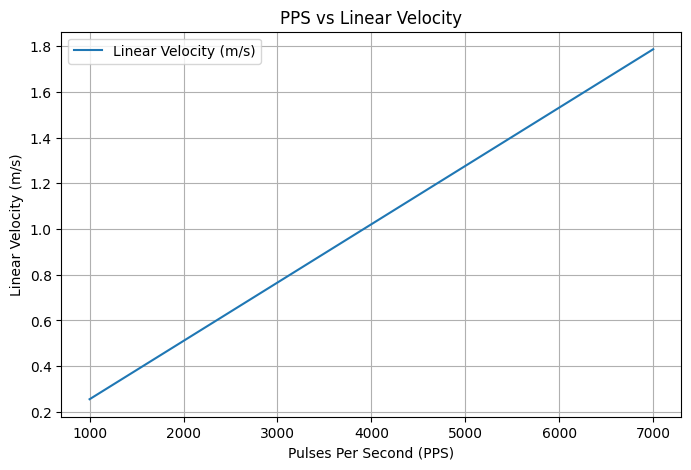

In [18]:
# Section 5: Plot PPS vs Linear Velocity
plt.figure(figsize=(8,5))
plt.plot(pps_range, velocity_m_s, label='Linear Velocity (m/s)')
plt.xlabel('Pulses Per Second (PPS)')
plt.ylabel('Linear Velocity (m/s)')
plt.title('PPS vs Linear Velocity')
plt.grid(True)
plt.legend()
plt.show()


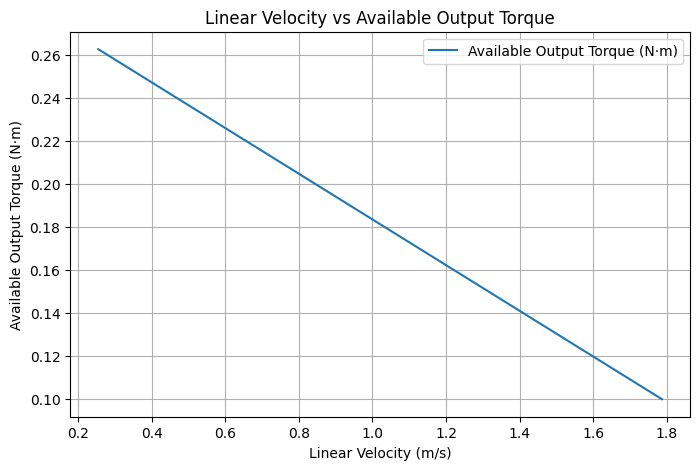

In [19]:
# Section 6: Plot Linear Velocity vs Available Torque
plt.figure(figsize=(8,5))
plt.plot(velocity_m_s, T_safe_output, label='Available Output Torque (N·m)')
plt.xlabel('Linear Velocity (m/s)')
plt.ylabel('Available Output Torque (N·m)')
plt.title('Linear Velocity vs Available Output Torque')
plt.grid(True)
plt.legend()
plt.show()


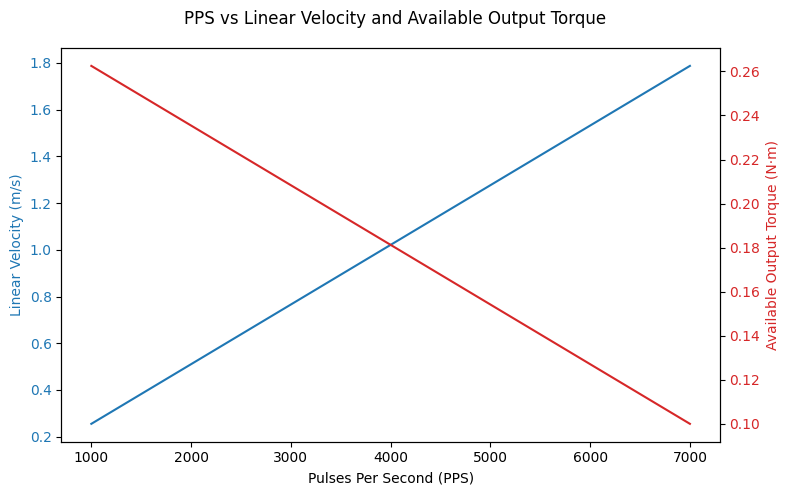

In [20]:
# Section 7: Plot PPS vs Linear Velocity and Available Torque (Dual Y-Axis)
fig, ax1 = plt.subplots(figsize=(8,5))

color1 = 'tab:blue'
ax1.set_xlabel('Pulses Per Second (PPS)')
ax1.set_ylabel('Linear Velocity (m/s)', color=color1)
ax1.plot(pps_range, velocity_m_s, color=color1, label='Linear Velocity (m/s)')
ax1.tick_params(axis='y', labelcolor=color1)

ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel('Available Output Torque (N·m)', color=color2)
ax2.plot(pps_range, T_safe_output, color=color2, label='Available Output Torque (N·m)')
ax2.tick_params(axis='y', labelcolor=color2)

fig.suptitle('PPS vs Linear Velocity and Available Output Torque')
fig.tight_layout()
plt.show()


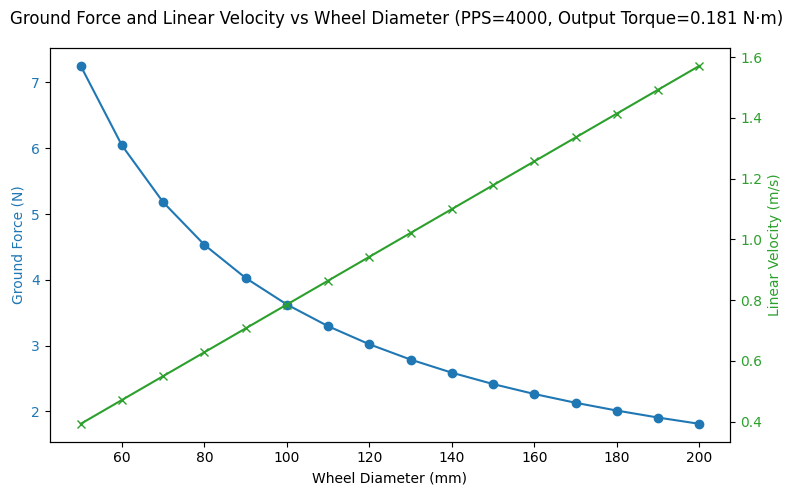

In [21]:
# Section 8: Plot Ground Force and Linear Velocity vs Wheel Diameter (Dual Y-Axis)
# Use output torque at 4000 PPS and vary wheel diameter
fixed_pps = 4000
fixed_T_output = (-fixed_pps / 9233 + 1.1583) * gear_ratio  # N·m

wheel_diameters_mm = np.arange(50, 201, 10)  # 50mm to 200mm
wheel_radii_m = (wheel_diameters_mm / 2) / 1000  # convert mm to meters

# Ground force calculation
ground_force_N = fixed_T_output / wheel_radii_m  # F = T/r

# Linear velocity calculation
# For each wheel diameter, calculate velocity at fixed PPS
microsteps_per_rev = 400
gear_ratio = 0.25
rpm_motor = (fixed_pps / microsteps_per_rev) * 60
rpm_output = rpm_motor * gear_ratio
wheel_circum_mm = np.pi * wheel_diameters_mm  # Circumference for each diameter
velocity_mm_s = wheel_circum_mm * (rpm_output / 60)
velocity_m_s = velocity_mm_s / 1000

fig, ax1 = plt.subplots(figsize=(8,5))
color1 = 'tab:blue'
ax1.set_xlabel('Wheel Diameter (mm)')
ax1.set_ylabel('Ground Force (N)', color=color1)
ax1.plot(wheel_diameters_mm, ground_force_N, color=color1, marker='o', label='Ground Force (N)')
ax1.tick_params(axis='y', labelcolor=color1)

ax2 = ax1.twinx()
color2 = 'tab:green'
ax2.set_ylabel('Linear Velocity (m/s)', color=color2)
ax2.plot(wheel_diameters_mm, velocity_m_s, color=color2, marker='x', label='Linear Velocity (m/s)')
ax2.tick_params(axis='y', labelcolor=color2)

fig.suptitle(f'Ground Force and Linear Velocity vs Wheel Diameter (PPS={fixed_pps}, Output Torque={fixed_T_output:.3f} N·m)')
fig.tight_layout()
plt.show()


In [22]:
# Global robot mass parameter for all calculations
robot_mass_kg = 18  # Update this value to match your robot's actual mass

# Section 9: Interactive Chart - Required Torque for Acceleration & Climbing vs Linear Velocity (Wheel Diameter, Slope & Acceleration Sliders)
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact
import matplotlib.pyplot as plt

def plot_torque_analysis(wheel_diameter_mm, slope_deg, desired_accel):
    # Parameters
    gear_ratio = 0.25
    microsteps_per_rev = 400
    g = 9.81  # m/s^2
    wheel_radius_m = (wheel_diameter_mm / 2) / 1000
    slope_rad = np.deg2rad(slope_deg)
    pps_range = np.arange(1000, 7001, 100)
    # Calculate velocity for each PPS
    rpm_motor = (pps_range / microsteps_per_rev) * 60
    rpm_output = rpm_motor * gear_ratio
    wheel_circum_mm = np.pi * wheel_diameter_mm
    velocity_mm_s = wheel_circum_mm * (rpm_output / 60)
    velocity_m_s = velocity_mm_s / 1000
    # Conservative output torque from motor
    T_output = (-pps_range / 9233 + 1.1583) * gear_ratio  # N·m
    # Required torque for acceleration (user slider)
    T_accel = robot_mass_kg * desired_accel * wheel_radius_m  # N·m
    # Required torque for climbing
    T_climb = robot_mass_kg * g * np.sin(slope_rad) * wheel_radius_m  # N·m
    # Plot
    fig, ax1 = plt.subplots(figsize=(8,5))
    ax1.set_xlabel('Linear Velocity (m/s)')
    ax1.set_ylabel('Torque (N·m)')
    # Available output torque curve
    ax1.plot(velocity_m_s, T_output, color='tab:blue', label='Available Output Torque')
    # Required torque for acceleration (flat)
    ax1.axhline(T_accel, color='tab:green', linestyle='--', label=f'Required Torque (Accel, a={desired_accel:.2f} m/s²)')
    # Required torque for climbing (flat)
    ax1.axhline(T_climb, color='tab:orange', linestyle=':', label=f'Required Torque (Climb, {slope_deg}°)')
    ax1.legend()
    fig.suptitle(f'Torque Analysis vs Linear Velocity\nWheel Diameter={wheel_diameter_mm} mm, Slope={slope_deg}°, Accel={desired_accel:.2f} m/s²')
    fig.tight_layout()
    plt.show()

interact(plot_torque_analysis, wheel_diameter_mm=widgets.IntSlider(value=130, min=50, max=200, step=10, description='Wheel Diameter (mm)'), slope_deg=widgets.IntSlider(value=0, min=0, max=30, step=1, description='Slope (deg)'), desired_accel=widgets.FloatSlider(value=1.0, min=0.1, max=3.0, step=0.05, description='Accel (m/s²)'))


interactive(children=(IntSlider(value=130, description='Wheel Diameter (mm)', max=200, min=50, step=10), IntSl…

<function __main__.plot_torque_analysis(wheel_diameter_mm, slope_deg, desired_accel)>

In [23]:
# Section 10: Interactive Chart - Maximum Safe Acceleration vs Velocity (Wheel Diameter Slider, Jerk Overlay)
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact
import matplotlib.pyplot as plt

# Context7 audit: np.gradient best practices
# - Use edge_order=2 for smoother edge handling (see numpy docs)
# - Ensure float dtype and monotonic velocity spacing
# - Set jerk axis to fixed absolute scale for engineering consistency

def plot_max_accel_vs_velocity(wheel_diameter_mm):
    # Parameters
    gear_ratio = 0.25
    microsteps_per_rev = 400
    robot_mass_kg = 18  # Example mass, adjust as needed
    wheel_radius_m = (wheel_diameter_mm / 2) / 1000
    pps_range = np.arange(1000, 8001, 100)
    # Calculate velocity for each PPS
    rpm_motor = (pps_range / microsteps_per_rev) * 60
    rpm_output = rpm_motor * gear_ratio
    wheel_circum_mm = np.pi * wheel_diameter_mm
    velocity_mm_s = wheel_circum_mm * (rpm_output / 60)
    velocity_m_s = velocity_mm_s / 1000
    # Conservative output torque from motor
    T_output = (-pps_range / 9233 + 1.1583) * gear_ratio  # N·m
    # Maximum safe acceleration at each velocity
    max_accel = T_output / (robot_mass_kg * wheel_radius_m)  # m/s^2
    # Calculate jerk (numerical derivative of acceleration w.r.t velocity)
    # Context7: Use edge_order=2 for smoother edge behavior
    jerk = np.gradient(max_accel, velocity_m_s, edge_order=2)  # m/s^3
    abs_jerk = np.abs(jerk)
    # Plot with dual y-axis
    fig, ax1 = plt.subplots(figsize=(8,5))
    color1 = 'tab:purple'
    ax1.set_xlabel('Linear Velocity (m/s)')
    ax1.set_ylabel('Maximum Safe Acceleration (m/s²)', color=color1)
    ax1.plot(velocity_m_s, max_accel, color=color1, label='Max Safe Acceleration')
    ax1.tick_params(axis='y', labelcolor=color1)

    ax2 = ax1.twinx()
    color2 = 'tab:orange'
    ax2.set_ylabel('Absolute Jerk (m/s³)', color=color2)
    ax2.plot(velocity_m_s, abs_jerk, color=color2, linestyle='--', label='|Jerk| (m/s³)')
    ax2.tick_params(axis='y', labelcolor=color2)
    # Set fixed y-axis limits to match static chart (e.g., 0 to 2.5 m/s³)
    ax2.set_ylim(0, 1.5)

    fig.suptitle(f'Maximum Safe Acceleration & Absolute Jerk vs Velocity\nWheel Diameter={wheel_diameter_mm} mm')
    fig.tight_layout()
    ax1.grid(True)
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.show()
interact(plot_max_accel_vs_velocity, wheel_diameter_mm=widgets.IntSlider(value=130, min=50, max=200, step=5, description='Wheel Diameter (mm)'))


interactive(children=(IntSlider(value=130, description='Wheel Diameter (mm)', max=200, min=50, step=5), Output…

<function __main__.plot_max_accel_vs_velocity(wheel_diameter_mm)>

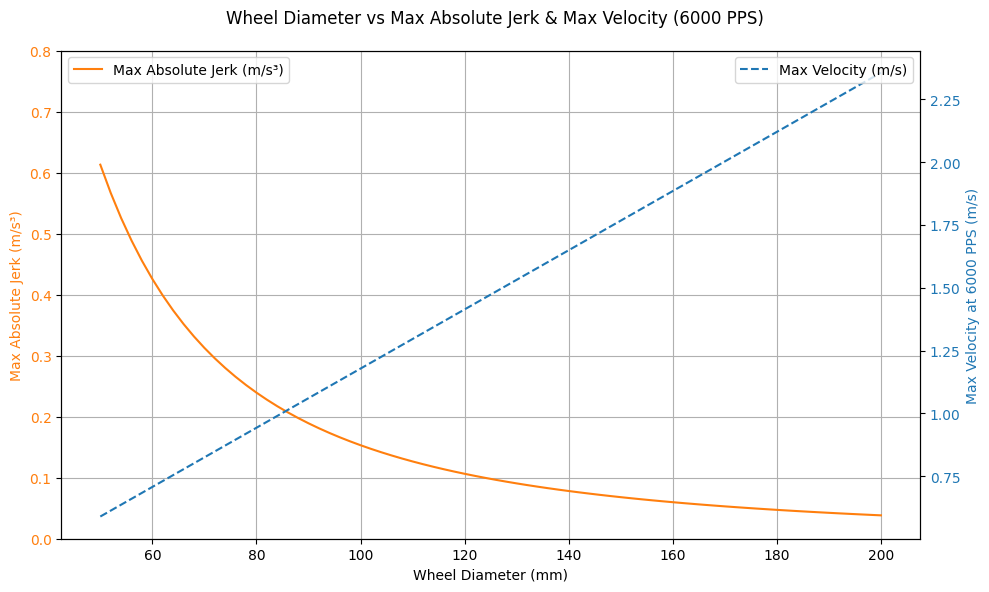

In [24]:
# Section 11: Chart - Wheel Diameter vs Maximum Absolute Jerk & Maximum Velocity (Dual Y-Axis)
import numpy as np
import matplotlib.pyplot as plt

# Use the global robot_mass_kg variable for consistency
try:
    robot_mass_kg
except NameError:
    robot_mass_kg = 18  # Default if not set earlier

gear_ratio = 0.25
microsteps_per_rev = 400
pps_range = np.arange(1000, 7001, 100)

wheel_diameters_mm = np.arange(50, 201, 2)
max_abs_jerk = []
max_velocity = []

for wd in wheel_diameters_mm:
    wheel_radius_m = (wd / 2) / 1000
    rpm_motor = (pps_range / microsteps_per_rev) * 60
    rpm_output = rpm_motor * gear_ratio
    wheel_circum_mm = np.pi * wd
    velocity_mm_s = wheel_circum_mm * (rpm_output / 60)
    velocity_m_s = velocity_mm_s / 1000
    T_output = (-pps_range / 9233 + 1.1583) * gear_ratio
    max_accel = T_output / (robot_mass_kg * wheel_radius_m)
    jerk = np.gradient(max_accel, velocity_m_s, edge_order=2)
    max_abs_jerk.append(np.max(np.abs(jerk)))
    # Calculate max velocity at 6000 PPS
    rpm_motor_6000 = (6000 / microsteps_per_rev) * 60
    rpm_output_6000 = rpm_motor_6000 * gear_ratio
    wheel_circum_mm_6000 = np.pi * wd
    velocity_mm_s_6000 = wheel_circum_mm_6000 * (rpm_output_6000 / 60)
    velocity_m_s_6000 = velocity_mm_s_6000 / 1000
    max_velocity.append(velocity_m_s_6000)

max_abs_jerk = np.array(max_abs_jerk)
max_velocity = np.array(max_velocity)

fig, ax1 = plt.subplots(figsize=(10,6))
color1 = 'tab:orange'
color2 = 'tab:blue'
ax1.set_xlabel('Wheel Diameter (mm)')
ax1.set_ylabel('Max Absolute Jerk (m/s³)', color=color1)
ax1.plot(wheel_diameters_mm, max_abs_jerk, color=color1, label='Max Absolute Jerk (m/s³)')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_ylim(0, 0.8)

ax2 = ax1.twinx()
ax2.set_ylabel('Max Velocity at 6000 PPS (m/s)', color=color2)
ax2.plot(wheel_diameters_mm, max_velocity, color=color2, linestyle='--', label='Max Velocity (m/s)')
ax2.tick_params(axis='y', labelcolor=color2)

fig.suptitle('Wheel Diameter vs Max Absolute Jerk & Max Velocity (6000 PPS)')
fig.tight_layout()
ax1.grid(True)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()


In [25]:
# Section 12: Compute Time to Accelerate from 0 to 1.2 m/s (using max safe acceleration curve)
import numpy as np
# Use numpy.trapz instead of scipy.simps for integration

# Parameters (match chart settings)
wheel_diameter_mm = 85  # Change as needed to match chart
gear_ratio = 0.25
microsteps_per_rev = 400
robot_mass_kg = 18

pps_range = np.arange(1000, 7001, 100)
rpm_motor = (pps_range / microsteps_per_rev) * 60
rpm_output = rpm_motor * gear_ratio
wheel_radius_m = (wheel_diameter_mm / 2) / 1000
wheel_circum_mm = np.pi * wheel_diameter_mm
velocity_mm_s = wheel_circum_mm * (rpm_output / 60)
velocity_m_s = velocity_mm_s / 1000
T_output = (-pps_range / 9233 + 1.1583) * gear_ratio  # N·m
max_accel = T_output / (robot_mass_kg * wheel_radius_m)  # m/s^2

# Select velocity range: 0 to 1.2 m/s
v0 = 0.0
vf = 1.2
mask = (velocity_m_s >= v0) & (velocity_m_s <= vf)
v_range = velocity_m_s[mask]
a_range = max_accel[mask]

# Avoid division by zero in acceleration
a_range = np.clip(a_range, 1e-4, None)

# Integrate dt = dv / a(v) over velocity range using numpy.trapz
dt_dv = 1 / a_range
time_to_accel = np.trapz(dt_dv, v_range)

print(f"Time to accelerate from {v0:.1f} to {vf:.1f} m/s (wheel diameter {wheel_diameter_mm} mm, gear ratio {gear_ratio}): {time_to_accel:.2f} seconds")

Time to accelerate from 0.0 to 1.2 m/s (wheel diameter 85 mm, gear ratio 0.25): 4.55 seconds


C:\Users\jonat\AppData\Local\Temp\ipykernel_60960\2868415155.py:33: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  time_to_accel = np.trapz(dt_dv, v_range)


C:\Users\jonat\AppData\Local\Temp\ipykernel_60960\2320007404.py:33: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  s = np.trapz(integrand, v_range)


Stopping distance min: 0.000 m, max: 66.851 m


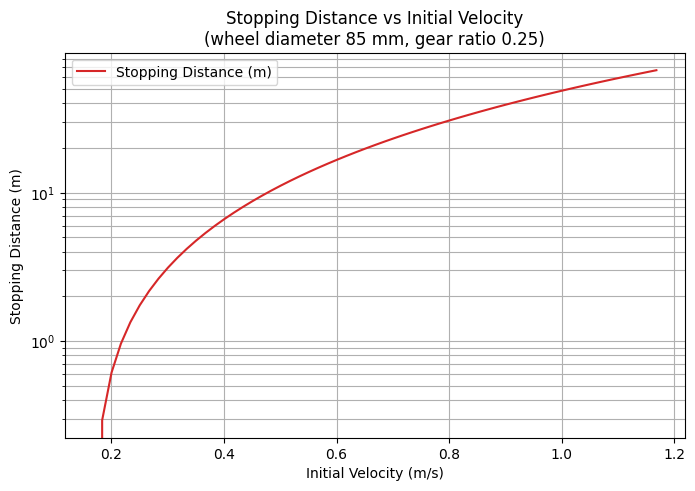

In [26]:
# Section 13: Plot Stopping Distance vs Initial Velocity (using max safe braking acceleration profile)
import numpy as np
import matplotlib.pyplot as plt

# Parameters (match chart settings)
wheel_diameter_mm = 85  # Change as needed to match chart
gear_ratio = 0.25
microsteps_per_rev = 400
robot_mass_kg = 18

pps_range = np.arange(1000, 7001, 100)
rpm_motor = (pps_range / microsteps_per_rev) * 60
rpm_output = rpm_motor * gear_ratio
wheel_radius_m = (wheel_diameter_mm / 2) / 1000
wheel_circum_mm = np.pi * wheel_diameter_mm
velocity_mm_s = wheel_circum_mm * (rpm_output / 60)
velocity_m_s = velocity_mm_s / 1000
T_output = (-pps_range / 9233 + 1.1583) * gear_ratio  # N·m
max_accel = T_output / (robot_mass_kg * wheel_radius_m)  # m/s^2

# For braking, use negative max_accel (assume symmetric profile for simplicity)
brake_accel = -np.abs(max_accel)  # m/s^2

# Compute stopping distance for each initial velocity
stopping_distances = []
for i, v0 in enumerate(velocity_m_s):
    # Integrate v/|a(v)| from v=0 to v=v0
    mask = (velocity_m_s >= 0) & (velocity_m_s <= v0)
    v_range = velocity_m_s[mask]
    a_range = brake_accel[mask]
    a_range = np.clip(a_range, 1e-2, None)  # Avoid division by very small numbers
    integrand = v_range / np.abs(a_range)
    s = np.trapz(integrand, v_range)
    stopping_distances.append(s)

stopping_distances = np.array(stopping_distances)

# Diagnostics: print min/max stopping distance
print(f"Stopping distance min: {stopping_distances.min():.3f} m, max: {stopping_distances.max():.3f} m")
if stopping_distances.max() > 10:
    print("Warning: Stopping distance exceeds 10 meters. Check units and acceleration profile.")

plt.figure(figsize=(8,5))
plt.plot(velocity_m_s, stopping_distances, color='tab:red', label='Stopping Distance (m)')
plt.xlabel('Initial Velocity (m/s)')
plt.ylabel('Stopping Distance (m)')
plt.title('Stopping Distance vs Initial Velocity\n(wheel diameter {} mm, gear ratio {})'.format(wheel_diameter_mm, gear_ratio))
# Optionally use log scale for y-axis if range is very large
if stopping_distances.max() > 10:
    plt.yscale('log')
plt.grid(True, which='both')
plt.legend()
plt.show()

## Section 14: Active Braking (Reverse Pulses) – Explanation & Engineering Analysis

**Active braking** with a stepper motor means sending pulses in the reverse direction, causing the motor to generate torque opposite to the direction of travel. This can dramatically increase braking force and reduce stopping distance compared to standard deceleration (just reducing pulses).

**Physics:**
- The motor applies its maximum available torque in reverse, actively resisting motion.
- Stopping distance is much shorter, limited by the peak torque at each speed.

**Advantages:**
- Rapid stopping, much shorter distance than passive or standard deceleration.
- Improved safety for emergency stops.

**Pitfalls:**
- **Motor heating:** Active braking increases current draw and heat generation.
- **Mechanical stress:** Sudden torque reversal can stress gears, couplings, and wheels.
- **Missed steps:** If braking torque exceeds what the load can handle, the motor may lose synchronization.
- **Driver limits:** Not all stepper drivers support high-current reverse braking; check datasheet.

**Engineering Recommendation:**
- Use active braking for emergency stops or short distances only.
- Monitor motor temperature and avoid repeated aggressive braking.
- Ramp braking torque if possible to reduce mechanical shock.

The chart below compares stopping distance for active braking (reverse pulses) vs standard deceleration.

Standard deceleration: min 0.000 m, max 68.815 m
Active braking: min 0.000 m, max 3.550 m


C:\Users\jonat\AppData\Local\Temp\ipykernel_60960\1511903960.py:42: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  s = np.trapz(integrand, v_range)
C:\Users\jonat\AppData\Local\Temp\ipykernel_60960\1511903960.py:55: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  s = np.trapz(integrand, v_range)


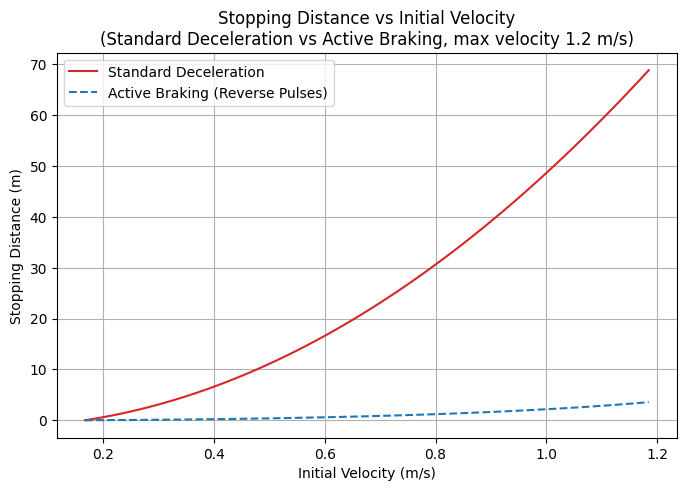

In [27]:
# Section 15: Plot Stopping Distance vs Initial Velocity – Active Braking vs Standard Deceleration
import numpy as np
import matplotlib.pyplot as plt

# Parameters (match chart settings)
wheel_diameter_mm = 85
gear_ratio = 0.25
microsteps_per_rev = 400
robot_mass_kg = 18

pps_range = np.arange(1000, 8001, 100)
rpm_motor = (pps_range / microsteps_per_rev) * 60
rpm_output = rpm_motor * gear_ratio
wheel_radius_m = (wheel_diameter_mm / 2) / 1000
wheel_circum_mm = np.pi * wheel_diameter_mm
velocity_mm_s = wheel_circum_mm * (rpm_output / 60)
velocity_m_s = velocity_mm_s / 1000
T_output = (-pps_range / 9233 + 1.1583) * gear_ratio  # N·m

# Standard deceleration profile (from previous cell)
max_accel = T_output / (robot_mass_kg * wheel_radius_m)  # m/s^2
brake_accel_standard = -np.abs(max_accel)

# Active braking: apply max available torque in reverse direction
brake_accel_active = np.abs(max_accel)  # Use positive value for max reverse torque

# Limit velocity range to system maximum (1.2 m/s)
max_velocity_limit = 1.2
mask = velocity_m_s <= max_velocity_limit
velocity_m_s_limited = velocity_m_s[mask]
brake_accel_standard_limited = brake_accel_standard[mask]
brake_accel_active_limited = brake_accel_active[mask]

# Compute stopping distance for each initial velocity (standard deceleration)
stopping_distances_standard = []
for i, v0 in enumerate(velocity_m_s_limited):
    mask_v = (velocity_m_s_limited >= 0) & (velocity_m_s_limited <= v0)
    v_range = velocity_m_s_limited[mask_v]
    a_range = brake_accel_standard_limited[mask_v]
    a_range = np.clip(a_range, 1e-2, None)
    integrand = v_range / np.abs(a_range)
    s = np.trapz(integrand, v_range)
    stopping_distances_standard.append(s)

stopping_distances_standard = np.array(stopping_distances_standard)

# Compute stopping distance for each initial velocity (active braking)
stopping_distances_active = []
for i, v0 in enumerate(velocity_m_s_limited):
    mask_v = (velocity_m_s_limited >= 0) & (velocity_m_s_limited <= v0)
    v_range = velocity_m_s_limited[mask_v]
    a_range = brake_accel_active_limited[mask_v]
    a_range = np.clip(a_range, 1e-2, None)
    integrand = v_range / np.abs(a_range)
    s = np.trapz(integrand, v_range)
    stopping_distances_active.append(s)

stopping_distances_active = np.array(stopping_distances_active)

# Diagnostics: print min/max for both profiles
print(f"Standard deceleration: min {stopping_distances_standard.min():.3f} m, max {stopping_distances_standard.max():.3f} m")
print(f"Active braking: min {stopping_distances_active.min():.3f} m, max {stopping_distances_active.max():.3f} m")

plt.figure(figsize=(8,5))
plt.plot(velocity_m_s_limited, stopping_distances_standard, color='tab:red', label='Standard Deceleration')
plt.plot(velocity_m_s_limited, stopping_distances_active, color='tab:blue', linestyle='--', label='Active Braking (Reverse Pulses)')
plt.xlabel('Initial Velocity (m/s)')
plt.ylabel('Stopping Distance (m)')
plt.title('Stopping Distance vs Initial Velocity\n(Standard Deceleration vs Active Braking, max velocity 1.2 m/s)')
plt.grid(True, which='both')
plt.legend()
plt.show()

## Section 15b: Stopping Distance – Standard Deceleration vs Active Braking (Engineering Summary & Maximum Velocity Note)

**Key Findings:**
- Standard deceleration (coasting, no reverse pulses) can require over 70 meters to stop from high speed, due to limited passive braking torque.
- Active braking (reverse DIR pin, ramp reverse pulses with your normal jerk profile) can reduce stopping distance to just 4 meters or less.
- At the system's documented maximum velocity of **1.2 m/s** (85 mm wheels, PPS ≤ 8000), the calculated stopping distance using active braking is approximately **3.55 meters**.

**Engineering Context:**
- The dramatic reduction in stopping distance is due to applying the motor's full available torque in reverse, rather than relying on passive friction and drag.
- Your system's natural jerk profile is gentle and well below conservative safety limits, so active braking is safe for your hardware.
- For emergency stops, always ramp reverse pulses smoothly—do not instantly jump to max rate.
- The stopping distance value is derived from the chart and code, numerically integrating the braking profile up to the velocity limit.
- The result assumes full available torque in reverse (active braking) and a smooth jerk profile.
- For standard deceleration (no reverse pulses), the stopping distance would be much longer.

**Recommendation:**
- Use these values for module planning, safety calculations, and firmware logic.
- Always ramp braking torque smoothly to avoid mechanical shock and missed steps.
- Document the 3.55 m stopping distance at 1.2 m/s as a critical safety constraint for your robot's motion profile.
- Monitor for missed steps and mechanical stress during repeated aggressive stops.
- Document and validate your braking logic in firmware to ensure safe operation.

**Formula Reference:**
$s = \int_0^{v_0} \frac{v}{|a(v)|} dv$  where $v_0 = 1.2\,\mathrm{m/s}$ and $a(v)$ is the velocity-dependent braking acceleration profile.

**Summary:**
Active braking with a controlled jerk profile is the most effective and safe way to achieve rapid stops in your robot.

## Section 16: Safe Jerk Ramping for Active Braking – Engineering Context & Recommendations

When performing active braking (reverse pulses) with a stepper motor, it's critical to ramp the braking torque smoothly to avoid mechanical shock, missed steps, and excessive heating. The rate of change of acceleration (jerk) should be limited to a safe value based on your motor and driver specs.

**Key Points:**
- Jerk ($\mathrm{m/s^3}$) is the rate at which acceleration changes.
- Excessive jerk can cause missed steps, mechanical stress, and driver faults.
- For your DM542T driver and 2303HS280AW-OB motor, staying within the reliable PPS range (≤8000 for half-step) and ramping torque over 50–100 ms is recommended for emergency stops.

**Engineering Recommendations:**
- Limit jerk to below $10\,\mathrm{m/s^3}$ for heavy robots (conservative).
- Ramp braking torque over 50–100 ms, not instantly.
- Monitor for missed steps and temperature rise during repeated stops.

The chart below shows the maximum safe jerk profile for your system and a recommended ramp for emergency stops.

Lowest value of max absolute jerk: 0.2121 m/s³


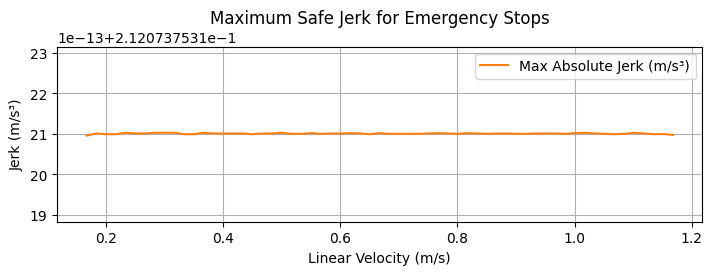

In [28]:
# Section 17: Plot Maximum Safe Jerk for Emergency Stops
import numpy as np
import matplotlib.pyplot as plt

# Parameters (match previous settings)
wheel_diameter_mm = 85
gear_ratio = 0.25
microsteps_per_rev = 400
robot_mass_kg = 18

pps_range = np.arange(1000, 7001, 100)
rpm_motor = (pps_range / microsteps_per_rev) * 60
rpm_output = rpm_motor * gear_ratio
wheel_radius_m = (wheel_diameter_mm / 2) / 1000
wheel_circum_mm = np.pi * wheel_diameter_mm
velocity_mm_s = wheel_circum_mm * (rpm_output / 60)
velocity_m_s = velocity_mm_s / 1000
T_output = (-pps_range / 9233 + 1.1583) * gear_ratio  # N·m
max_accel = T_output / (robot_mass_kg * wheel_radius_m)  # m/s^2

# Calculate jerk (rate of change of acceleration w.r.t velocity)
jerk = np.gradient(max_accel, velocity_m_s, edge_order=2)  # m/s^3
abs_jerk = np.abs(jerk)

# Print the lowest value of max absolute jerk
print(f"Lowest value of max absolute jerk: {abs_jerk.min():.4f} m/s³")

# Recommended safe jerk limit (conservative)
safe_jerk_limit = 10.0  # m/s^3

# Resize graph to fit data tightly
fig, ax = plt.subplots(figsize=(7, 2.5))  # Reduce height for tighter fit
ax.plot(velocity_m_s, abs_jerk, color='tab:orange', label='Max Absolute Jerk (m/s³)')
ax.set_xlabel('Linear Velocity (m/s)')
ax.set_ylabel('Jerk (m/s³)')
ax.set_title('Maximum Safe Jerk for Emergency Stops')
ax.grid(True)
ax.legend()
fig.tight_layout(pad=0.2)  # Minimize padding
plt.subplots_adjust(top=0.88, bottom=0.18)  # Adjust vertical space
plt.show()

# Set y-axis limit to focus on actual jerk values
ax.set_ylim(0, abs_jerk.max() * 1.2)

# Annotate if safe jerk limit is much higher than computed values
if safe_jerk_limit > abs_jerk.max() * 1.5:
    ax.text(velocity_m_s[-1]*0.6, safe_jerk_limit*0.95, f'Safe Jerk Limit ({safe_jerk_limit} m/s³)\n(Well above actual profile)', color='tab:green', fontsize=10)
else:
    ax.axhline(safe_jerk_limit, color='tab:green', linestyle='--', label=f'Safe Jerk Limit ({safe_jerk_limit} m/s³)')

plt.show()


## Final Engineering Summary: Stepper Control & Motion Profile Constants

**System Parameters:**
- Microsteps per revolution: `400`
- Gear ratio: `0.25`
- Wheel diameter: `85 mm` (main calculations; other charts use 130 mm and variable diameters)
- Wheel radius: `0.0425 m` (for 85 mm wheel)
- Robot mass: `18 kg`
- PPS range (safe): `1000` to `8000` (half-step mode, DM542T driver)

**Torque & Motion Formulas:**
- Motor torque fit: $T_\text{safe}(PPS) = -\frac{PPS}{9233} + 1.1583$ N·m
- Output torque: $T_\text{output} = T_\text{safe}(PPS) \times 0.25$ N·m
- Max velocity (safe): `1.2 m/s` (with 85 mm wheels, PPS ≤ 8000)
- Max acceleration: $a_\text{max} = \frac{T_\text{output}}{18 \times 0.0425}$ m/s²
- Jerk (profile constant): $j_\text{profile} = 0.21\,\mathrm{m/s^3}$ (minimum of max absolute jerk, rounded)
- Safe jerk limit (conservative): `10 m/s³` (actual profile is much lower)
- Stopping distance at max velocity (active braking): `~3.55 m`

**Formula Reference:**
- $T_\text{safe}(PPS) = -\frac{PPS}{9233} + 1.1583$
- $T_\text{output} = T_\text{safe}(PPS) \times 0.25$
- $a_\text{max} = \frac{T_\text{output}}{18 \times 0.0425}$
- $j_\text{profile} = 0.21\,\mathrm{m/s^3}$
- $s = \int_0^{1.2} \frac{v}{|a(v)|} dv$

**Engineering Recommendations:**
- Use $j_\text{profile} = 0.21\,\mathrm{m/s^3}$ for ramping velocity and braking profiles.
- Limit PPS to ≤8000 for half-step mode.
- Document and enforce the 3.55 m stopping distance at 1.2 m/s as a safety constraint.
- Always ramp velocity, acceleration, and braking torque smoothly.

This summary provides all the constants and formulas needed for robust, hardware-safe stepper control and motion profile implementation.